# Practical Assignment 1
#### *Submitted by Mukul Aryal (CS IV/I)*
##### Building a neural network from scratch

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# 'widget' has better Vscode support than 'inline'
%matplotlib inline


In [2]:
# XOR Dataset Creation
X = np.array([ [0,0], [0,1], [1,0], [1, 1] ])
y = np.array([ [0], [1], [1], [0] ]) # True labels

In [3]:
# MLP node numbers
num_input = 2
num_hidden = 5
num_output = 1

In [4]:
# Initialize weights and biases randomly
"""
Weights from i/p to h (Wxh) has dim num_input x num_hidden
Weights from h to o/p (Why) has dim num_hidden x num_output
"""
Wxh = np.random.randn(num_input, num_hidden)
bh = np.random.randn(1, num_hidden)

Why = np.random.randn(num_hidden, num_output)
by = np.random.randn(1, num_output)

In [5]:
# All relevant functions defined in this cell

sigmoid = lambda x : 1/(1+np.exp(-x))
sigmoid_derivative = lambda x : np.exp(-x)/((1+np.exp(-x))**2)

cost_function = lambda y,y_hat : 0.5*sum((y-y_hat)**2)

def forward_prop(X, Wxh, Why):
    z1 = np.dot(X, Wxh) + bh
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    
    return z1, a1, z2, y_hat

def backward_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

In [6]:
# Hyperparameters
alpha = 0.01
num_iterations = 5000

In [7]:
# Training Loop

cost = [] # Keep track of costs to plot later

for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)
    
    # Update weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
    
    # Compute cost
    c = cost_function(y, y_hat)
    cost.append(c)

Text(0, 0.5, 'Cost')

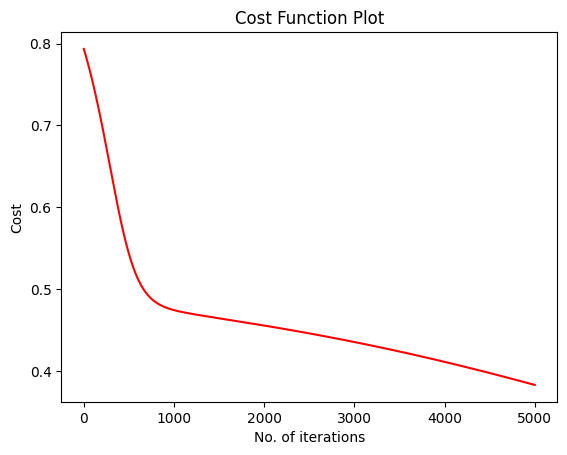

In [8]:
# Loss Plot
plt.title("Cost Function Plot")
plt.plot(range(num_iterations), cost, c="r")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")